<a href="https://colab.research.google.com/github/sumaiyasiddiqa/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_(Sumaiya_Siddiqa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. 
It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs.
It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed 
and published on the platform either with a charge or free of cost. With the rapidly growth of Android devices and apps,
it would be interesting to perform data analysis on the data to obtain valuable insights.

Lets look at the data which consists of two files:


**1.   playstoredata.csv**:It contains all the detials of the apps on play store

**2.   userreview.csv**  :It contains user reviews for each app.The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. 








 # **Exploring Play Store Data**





In [83]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")


In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#Load th csv file
file_path="/content/drive/MyDrive/CAPSTONE1(play store app review analysis)/Play Store Data.csv"
ps_df=pd.read_csv(file_path)

In [86]:
#Lets randomly look at the rows of the dataset
ps_df[10:20]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12M,"1,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.0.15,4.0 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,"100,000+",Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,"100,000+",Free,0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
17,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,"10,000+",Free,0,Everyone,Art & Design,"November 7, 2017",1.0,2.3 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up


In [87]:
ps_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [88]:
#Finding the names of the columns and the number of rows and columns
print(list(ps_df.columns))
print(f'The number of rows of the dataframe playstore data are :{ps_df.shape[0]}')
print(f'The number of columns of the dataframe playstore data are: {ps_df.shape[1]}')

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
The number of rows of the dataframe playstore data are :10841
The number of columns of the dataframe playstore data are: 13


The description of columns of playstore dataframe :
   



> 

1.    App : It has the name of the application.
2.    Category : It has the category to which the app belongs.
3.    Rating :  It has the average rating given by the users in the play store.
4.    Reviews : It tells us about the total number of users who have given a review for the application.
5.    Size : It has the size of the app.
6.    Installs : It has the total no of downloads or installs.
7.    Type : It tells about the type of the app whether free or paid.
8.    Price : It has the price of the app.
9.    Content rating : It states whether or not an app is suitable for all age groups or not. 
10.   Genres : The genre of the app
11.   Last updated : It has the date on which the app was last updated.
12.   Current ver : It has the current version of the app.
13.   Android ver : It tells about the minimum android version required to run the app.










## **Data cleaning**

Removing the null values and duplicate values present in the dataset.By looking at the dataset carefully we can see that their are many special characters and letters in the columns like (Install, Price,Size) which make their conversion to numeric datatype difficult.Let's clean the data by removing all these.



In [89]:
#Check on the null values
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

By above analysis we can see that 'Ratings' column has 1474 null values which is 13% of the data of ratings column, column 'Type' has 1 null value, column 'Content rating' has 1 null value, column 'Current ver' has 8 null values and column 'Android ver' has 3 null values.


Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

### **1. Android ver has 3 null values**

In [90]:
#The rows containing the null values in column Android Ver
ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [91]:
#android ver has 3 null values
ps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since we cannot replace the null values with any other values, lets drop the 3 rows which constitues only 0.03% of the total data of the column 

In [92]:
ps_df=ps_df[ps_df['Android Ver'].notna()]
ps_df.shape

(10838, 13)

We dropped the NaN values of Android Ver.

### **2. Current Ver has 8 Null values**

In [93]:
#The rows containing null values in the Current Ver column
ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [94]:
#Finding the different values in the Current Ver column
ps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

We cannot replace the null values with any other values in the Current Ver column, So we have to drop the rows with null values

In [95]:
#Dropping the rows with null values in the Current Ver column
ps_df=ps_df[ps_df['Current Ver'].notna()]
ps_df.shape

(10830, 13)

### **3.Type column has only one null value**

In [96]:
#The row containiing the null value in the column Type
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [97]:
#Checking the values in the Type column
ps_df['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

As the Type column has the type of the app i.e, paid or free and in the above row the price column has value 0, we can change the Type column null value to 'free'

In [98]:
#Changing the Type column null value to 'free'
ps_df.loc[9148,'Type']='Free'

In [99]:
#checking the result
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


We successfully replaced the null value of column Type to 'Free'

### **4.Rating column has 1474 null values**

In [100]:
#The rows containing the null values in the Rating column
ps_df[ps_df['Rating'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Rating columns has 1474 null values so if we drop the rows we will loose a large amount of data.
In this case we should replace the null values with the median of the remaining values in the Rating column

In [101]:
#User defined function to find the median of the column Rating
def replace_with_median(series):
    return series.fillna(series.median())

ps_df['Rating'] = ps_df['Rating'].transform(replace_with_median)

In [102]:
#Now lets check the null values in the dataset Play Store Data
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Handling the duplicate values**

### **1. Handling the duplicate values in the App column**

In [103]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [104]:
ps_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [105]:
#Lets check the duplicate values 
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [106]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [107]:
#Dropping duplicates from the column App
ps_df.drop_duplicates(subset='App',inplace=True)
ps_df.shape

(9649, 13)

In [108]:
#checking if the duplicate rows are dropped or not
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We have dropped the duplicate values in the column App.Now the rows of the dataset are 9649.

### **Change the datatype of Last Updated column from string to datetime datatype**

In [109]:
ps_df['Last Updated']=pd.to_datetime(ps_df['Last Updated'])
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   object        
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.0+ MB


### **Changing the datatype of Price column from string to float**

To change the datatype of Price column from string to float, first we have to remove the $ symbol from all the rows

In [110]:
ps_df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [111]:
#Creating a userdefined function to drop the $ symbol
prices = [i for i in ps_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

ps_df['Price'] = clean_prices(prices)
ps_df['Price'] = ps_df['Price'].astype(float)

In [112]:
#Checking if the $ symbol is removed
ps_df[ps_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


In [113]:
#checking if the datatype of Price column is changed to float
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


### **Changing the datatype of Install column from string to integer**

In [114]:
#Checking the contents of Install column
ps_df['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

To change the datatype of the Installs column, we first need to remove the + symbol from the Installs column

In [115]:
installs = [i for i in ps_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
ps_df['Installs'] = clean_installs(installs)


In [116]:
#Checking if the '+' and ',' symbols from the Installs column
ps_df['Installs'].loc[10:20]

10     1000000
11     1000000
12    10000000
13      100000
14      100000
16      500000
17       10000
18     5000000
19    10000000
20      100000
Name: Installs, dtype: int64

We successfully converted the datatype of Installs column from string to Integer 

### **Changing the datatype of Reviews column from string to integer**

In [117]:
ps_df['Reviews']=ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [118]:
#Checking if the datatype of the column Reviews is changed from string to int
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.3+ MB


### **Converting the values in Size column to a same unit of measure(MB)**

In [119]:
ps_df['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the Size column have letters 'M' which denotes MB and 'k' which denotes KB.
Now let us convert all the values to a singe unit MB

We know that 1MB=1024KB, to convert the values to MB we need to divide all the values with 'k' by 1024

In [120]:
#Create a userdefined function to convert KB to MB
def convert_kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [121]:
#Apply the above function to the Size column
ps_df['Size']=ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [122]:
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))


A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis lets see if it can be inputed with the mean or median value of the entries in this column.

In [123]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].max()

min_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(ps_df[ps_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = ps_df[ps_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

# **Data Exploration - Univariate & Bivariate Analysis**

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.



Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

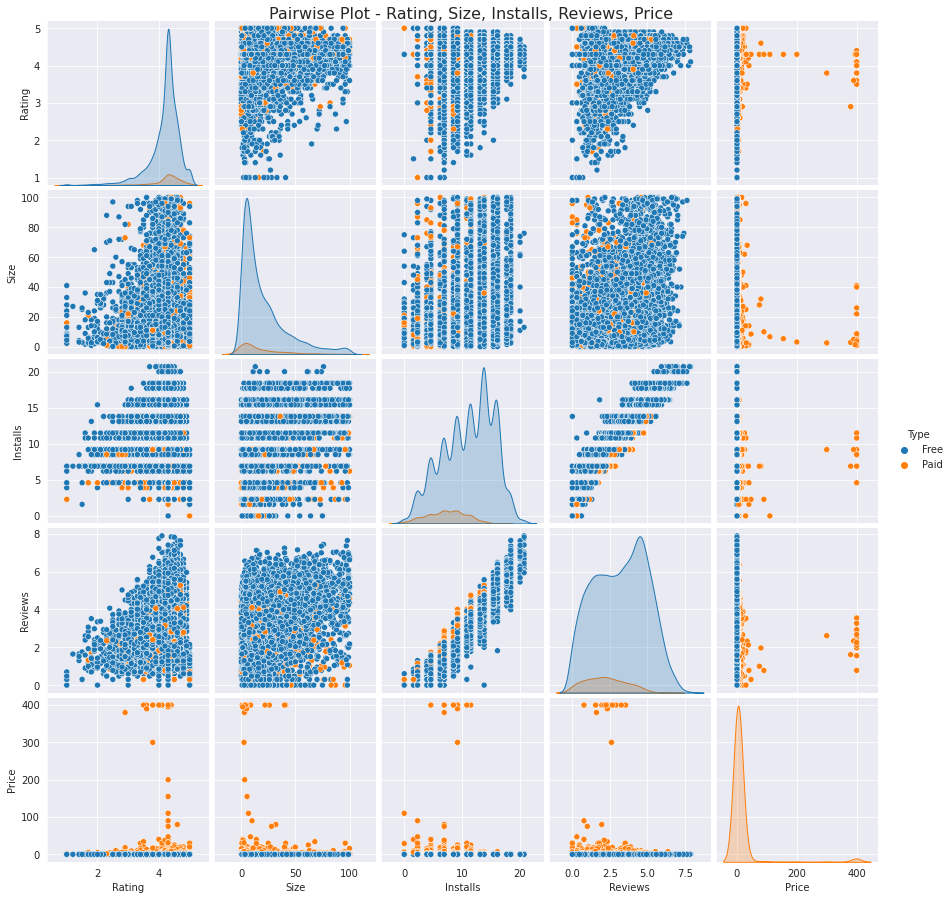

In [124]:
Rating = ps_df['Rating']
Size = ps_df['Size']
Installs = ps_df['Installs']
Reviews = ps_df['Reviews']
Type = ps_df['Type']
Price = ps_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

**FINDINGS**
* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
*Most of the Apps are light-weighted.

## **Exploring the User_review DataFrame**

In [125]:
#Reading the User_defined dataframe
file_path="/content/drive/MyDrive/CAPSTONE1(play store app review analysis)/User Reviews.csv"
ur_df=pd.read_csv(file_path)

In [126]:
#Check the top 5 rows of the dataframe
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [127]:
#Checking the no of rows and columns in the dataset
print(f"The no of rows in the User_review dataset are {ur_df.shape[0]}")
print(f"The no of columns in the User_review dataset are {ur_df.shape[1]}")

The no of rows in the User_review dataset are 64295
The no of columns in the User_review dataset are 5


In [128]:
#Checking the names of the columns
print(list(ur_df.columns))

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


**Let us first define what information the columns contain based on our inspection.**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

## **Lets handle the null values in the User_review dataset**

In [129]:
#Finding the NaN values in each column of the dataset
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [130]:
#Checking the null values in the Translated_reviews column
ur_df[ur_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


The Sentiment, Sentiment_Polarity and Sentiment_Subjectivity columns are based on the Translated_Review column. So we can can drop the null values of the Translated_Review column


In [131]:
#dropping the rows containing null values
ur_df=ur_df.dropna()

In [132]:
ur_df.shape

(37427, 5)

In [133]:
#lets check the updated dataframe
ur_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


We can see that we have successfully dropped the rows containing the null values from the dataset


We have completed the cleaning of dirty data. Now we can perform data visualization.


### **Let's check if  there is any co-relation between the two dataframes**


In [134]:
ps_copy=ps_df.copy()
ur_copy=ur_df.copy()
merged_ps_df=pd.merge(ps_copy,ur_copy,how='inner',left_on='App',right_on='App')
def Mergedinfo():
    temp = pd.DataFrame(index=merged_ps_df.columns)
    temp['data_type'] = merged_ps_df.dtypes
    temp["count of non null values"] = merged_ps_df.count()
    temp['NaN values'] = merged_ps_df.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(merged_ps_df)).round(4)*100 
    temp['unique_count'] = merged_ps_df.nunique()
    return temp 
Mergedinfo()



,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,35929,0,0.00,816
Category,object,35929,0,0.00,33
Rating,float64,35929,0,0.00,22
Reviews,int64,35929,0,0.00,807
Size,float64,24069,11860,33.01,166
Installs,int64,35929,0,0.00,12
Type,object,35929,0,0.00,2
Price,float64,35929,0,0.00,9
Content Rating,object,35929,0,0.00,5
Genres,object,35929,0,0.00,67


In [135]:
merged_ps_df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167534,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,-0.080021,-0.009315
Size,0.167534,0.430137,1.000000,0.213743,-0.019786,-0.159388,0.009185
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019786,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.159388,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009185,-0.006307,0.003182,0.259668,1.000000


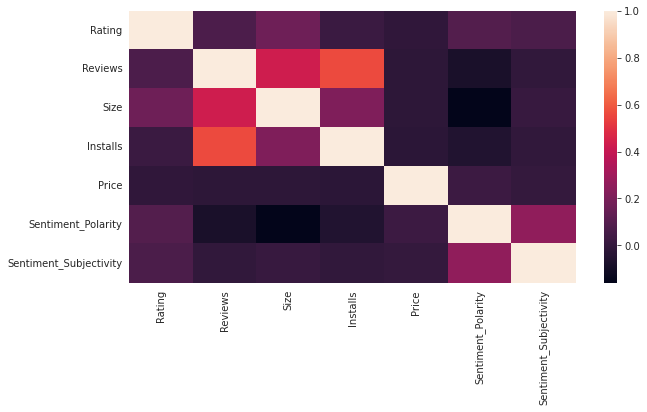

In [136]:
plt.figure(figsize=(10,5))
corr=merged_ps_df.corr()
sns.heatmap(corr)
plt.show()

## **Exploratory Analysis and Visualization**

### **1.Top categories on the playstore**



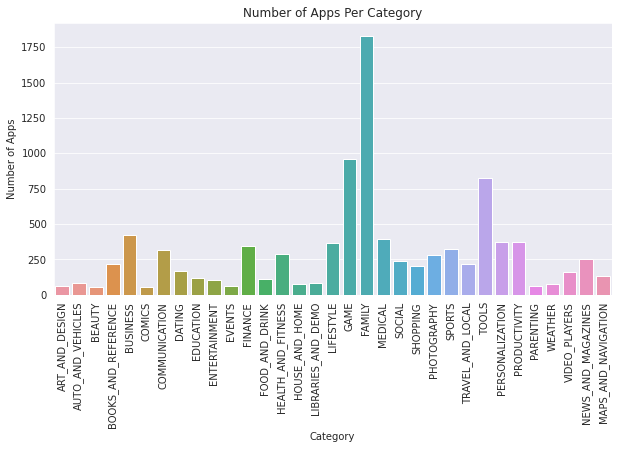

In [137]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=ps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Findings:
1. The highest number of apps are from the category Family, then comes Game and Tools .
2. The least number of apps are from the category Beauty


### **2.Which category Apps have most number of Installs?**

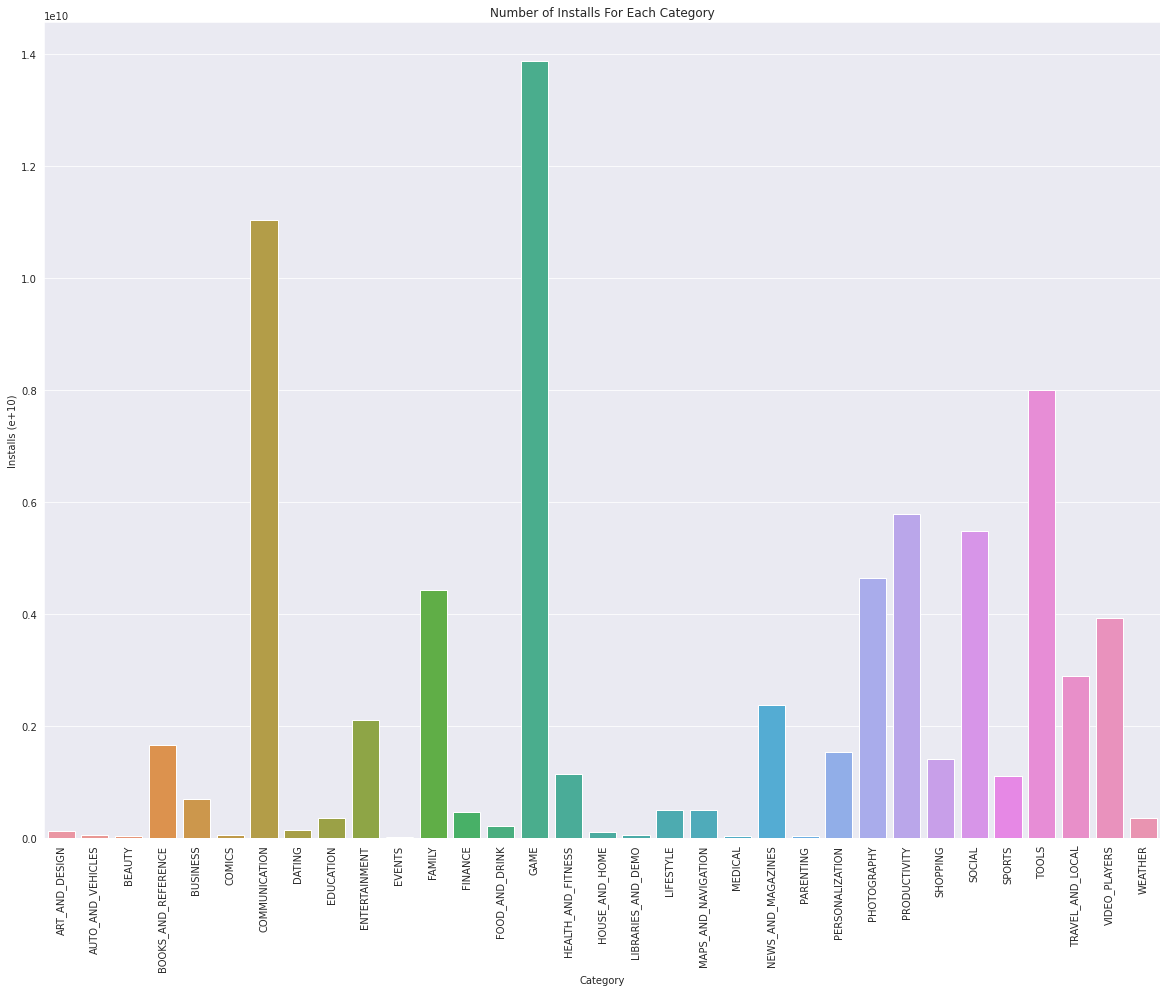

In [138]:
categories = ps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(20, 15))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

Findings:
1. The highest number of installs are from the category 'Game' and next is 'Communication'.
2. The lowest number of installs arre from the category Events

### **3.Average Rating of the Apps**

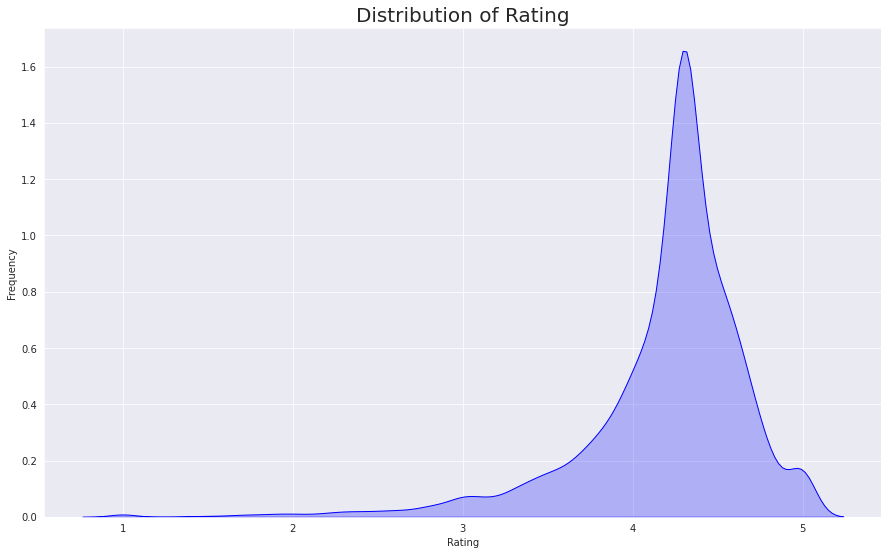

In [139]:
 #show the distribution of rating
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(ps_df['Rating'], color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);



Findings:
1. The distribution shows that most of the apps in the play store have an avg rating of 4.3 and the ratings lies in the range of 4.0 and 4.8

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

In [140]:
#create a new column Rating_group in the main dataframe 
def Rating_app(val):
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'
ps_df['Rating_group']=ps_df['Rating'].apply(lambda x: Rating_app(x))


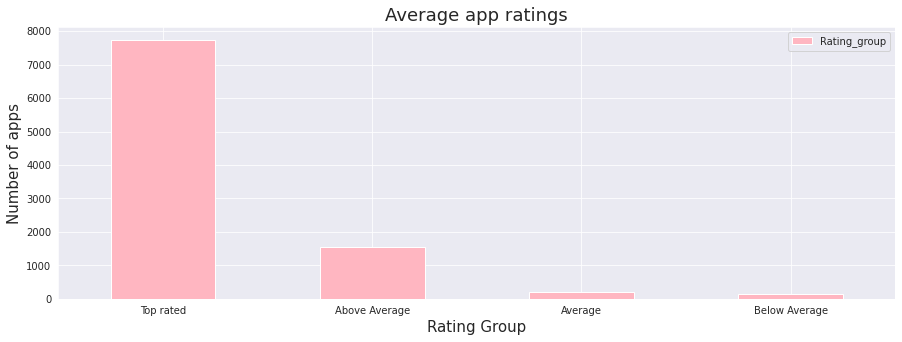

In [141]:
#Now lets see the distribution of the average ratings
ps_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'lightpink')
plt.xlabel('Rating Group', fontsize = 15)
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

### **4.What is the percentage of number of paid apps and free apps?**

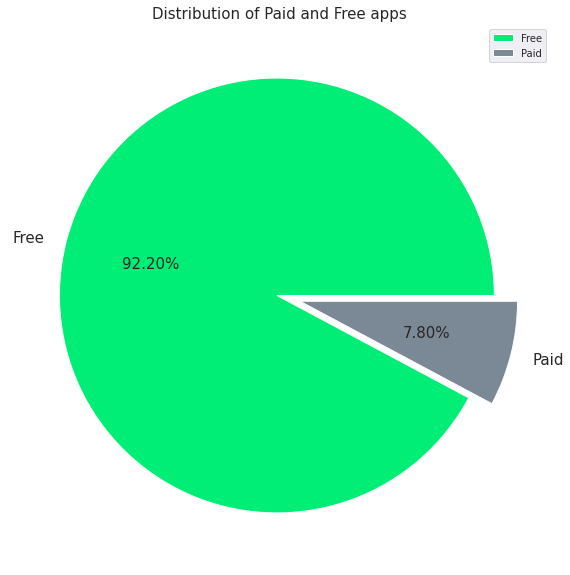

In [142]:
data = ps_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

Findings:
 1. About 92.2% of the apps are free.
 2. 7.8% are paid apps.

### **4. Distribution of Apps in terms of their rating, type and size**

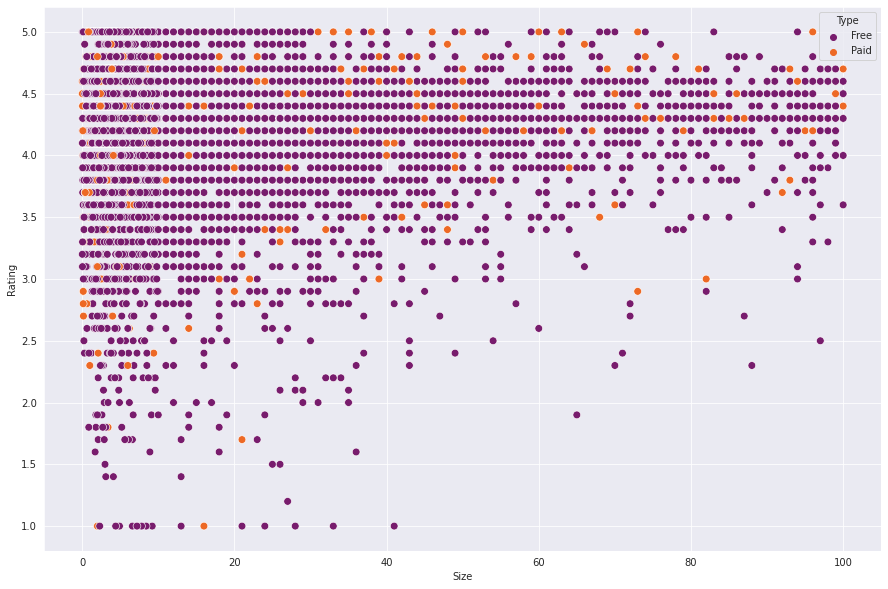

In [165]:
plt.figure(figsize=(15, 10))
sns.scatterplot(ps_df['Size'],
               ps_df['Rating'],
               hue=ps_df['Type'], edgecolor='white', palette="inferno",
               s=60)

Findings:
1. Majority of the free apps are small in size
2. Majority of the free small size apps have high ratings

### **5. Correlation**

In [144]:
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050212,0.045528,0.034306,-0.018674
Reviews,0.050212,1.000000,0.179275,0.625158,-0.007603
Size,0.045528,0.179275,1.000000,0.134216,-0.022494
Installs,0.034306,0.625158,0.134216,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.022494,-0.009412,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

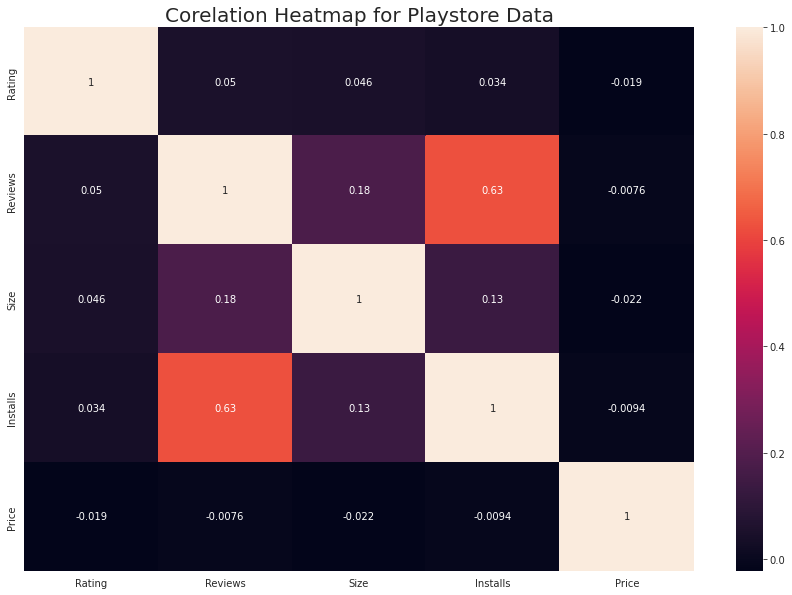

In [145]:
# Heat map for play_store
plt.figure(figsize = (15,10))
sns.heatmap(ps_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

### **6. What are the Top 10 installed apps in any category?**

In [146]:
def Top_10(str):
    str = str.upper()
    top10 = ps_df[ps_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(8,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 15)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

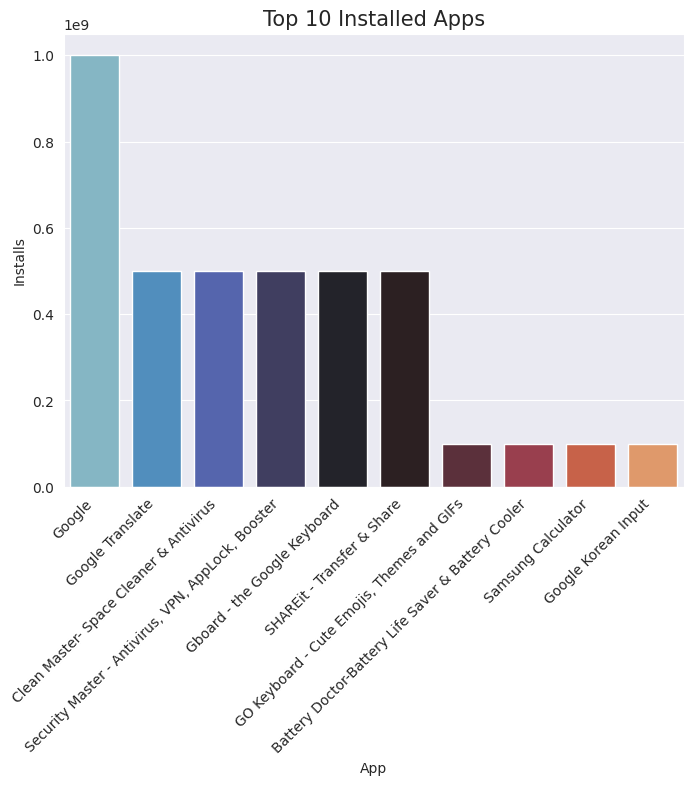

In [147]:
#top 10 apps in the category Tools
Top_10('Tools')

### **7. Top Apps that are of free type**

In [148]:
#creating a dataframe only for apps of the type free
free_df=ps_df[ps_df['Type']=='Free']


In [149]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Top rated
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,Top rated
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,Top rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,Top rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,Top rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,Top rated
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,Top rated


In [150]:
top_free_df["App"]

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

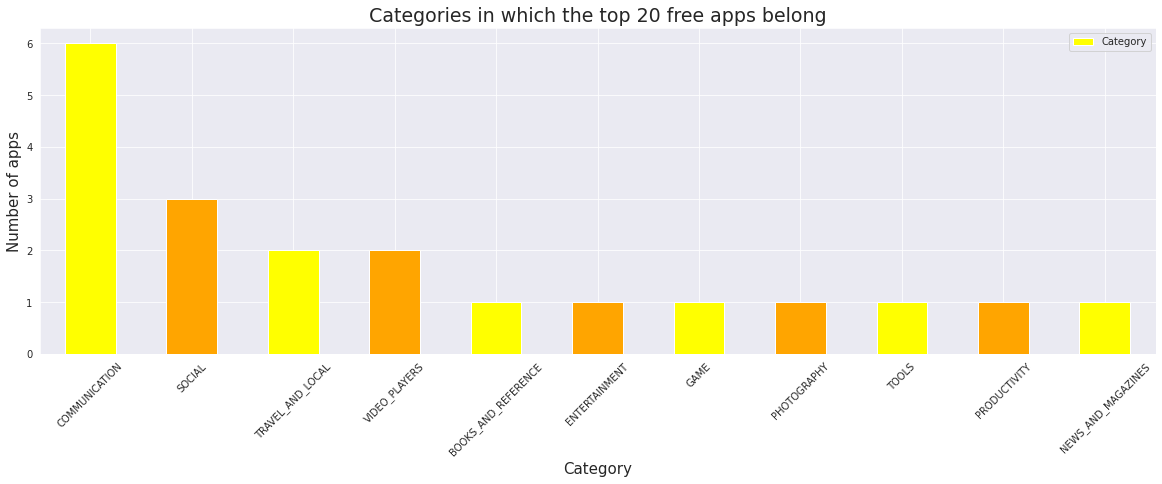

In [151]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('yellow','orange'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


### **8. What is the count of Apps in different genres?**


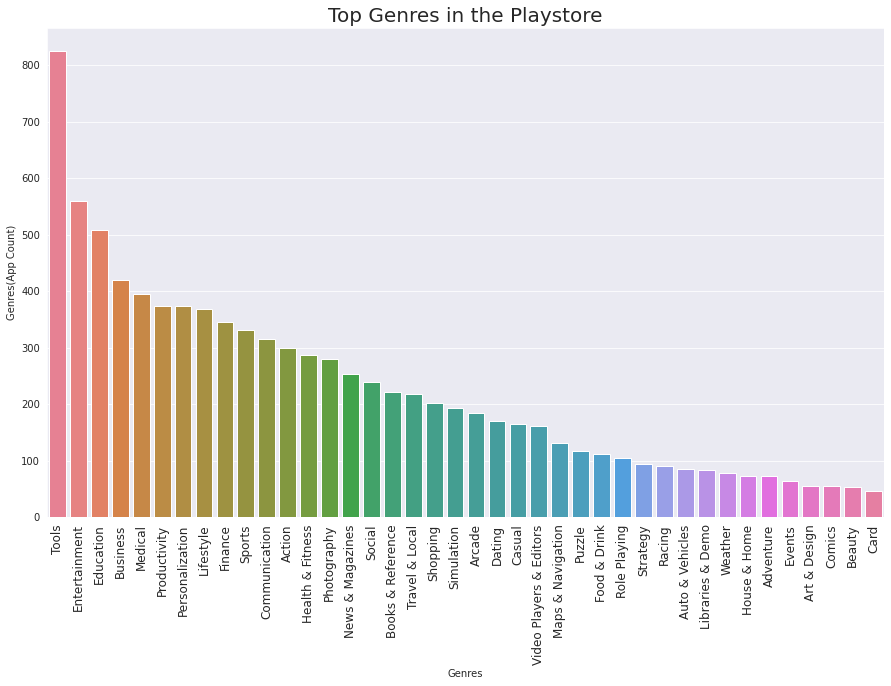

In [152]:
topAppsinGenres = ps_df['Genres'].value_counts().head(40)

x3sis = []
y3sis = []
for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

    
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="husl")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

Findings:
 1. The highest number of App are found in the tools genre.
 2. Next place is taken by entertainment,education and business etc.


### **9. Android Version based on each category**

In [153]:
ps_df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
ps_df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
ps_df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
ps_df['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            50
                2.0             9
                3.0             2
                1.0             1
                5.0             1
                               ..
WEATHER         4.0            38
                1.0            23
                2.0            10
                5.0             7
                3.0             1
Name: Android Ver, Length: 199, dtype: int64


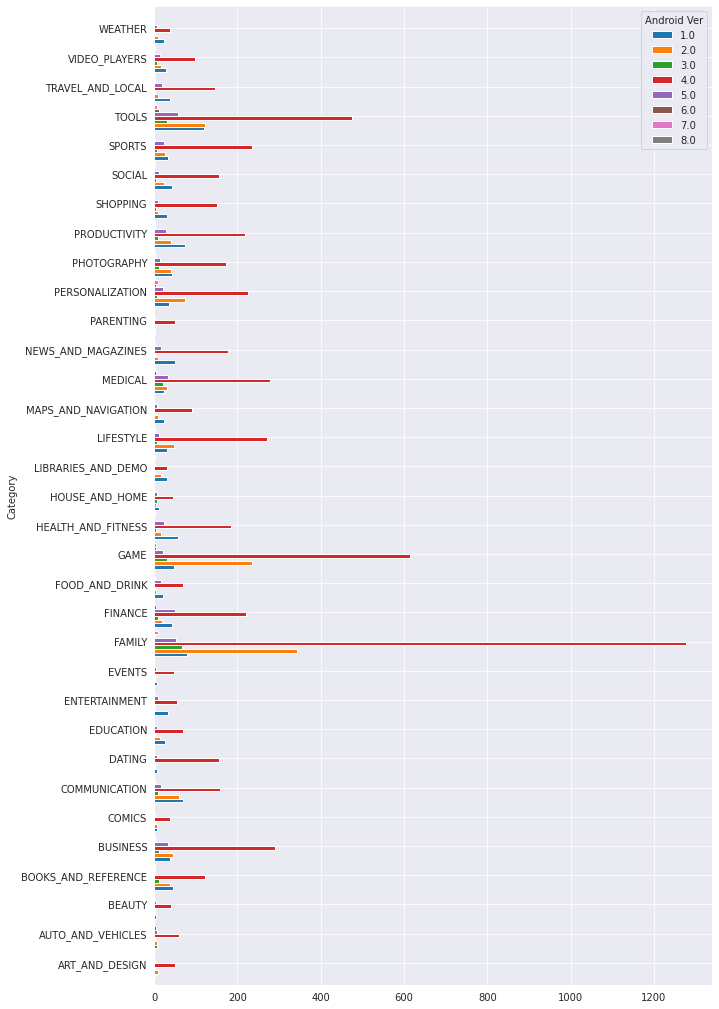

In [154]:
print(ps_df.groupby('Category')['Android Ver'].value_counts())
Type_cat = ps_df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

Findings:
1. Majority of the Apps run on the Android Version 4.0 and up

### **10.  Is Sentiment subjectivity proportional to sentiment polarity?**


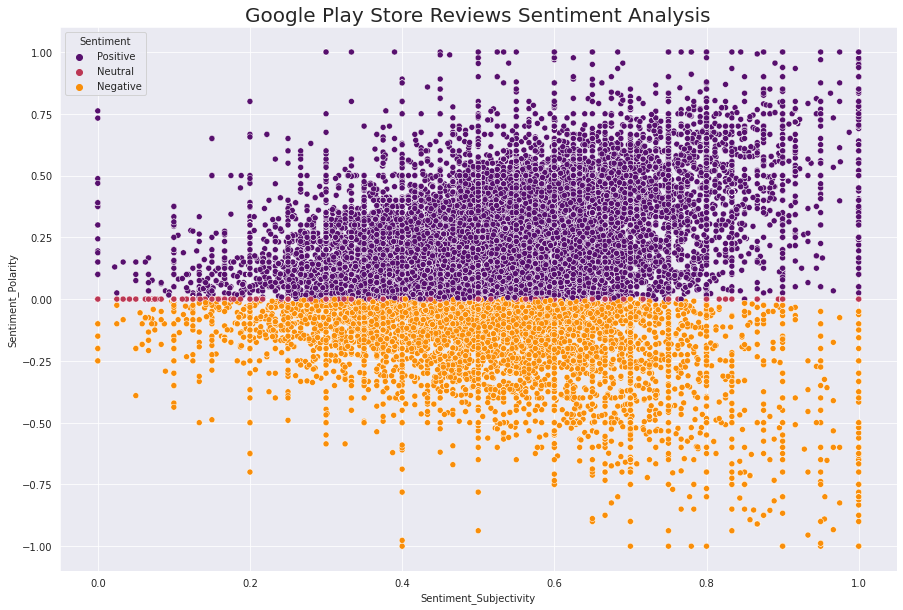

In [170]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(ur_df['Sentiment_Subjectivity'], ur_df['Sentiment_Polarity'],
                hue = ur_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

Findings:

 1.Sentiment subjectivity is not always proportional to sentiment polarity.
 2.But, in maximum cases it show proportional behaviour when the variance is too high or low

### **11. Percentage of the review sentiments**


In [156]:
counts = list(merged_ps_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()


NameError: ignored